1. Pure birth process
In a pure birth process, the chance of an event occurring at a given instant of time depends on the number of events that have already occurred. An example of this phenomenon is the reproduction of living organisms, hence the name of the process. This process considers only the birth or arrival of new members, permitted with certain conditions, such as, sufficient food, no mortality, and no migration out of the system.
Let X(t) represent the number of births in the time interval (0,t]. We define a pure birth process as a Markov process satisfying the following:


In [5]:
import matplotlib.pyplot as plt
import numpy as np


def purebirth(N,b,N0):
# s -- sojourn time
# p -- population number
# b -- birth rate
# N0 -- initial populaiton number
    s = np.zeros(N)
    X = np.zeros(N)
    X[0] = N0
    for i in range(N-1):
        U = np.random.rand()
        h = -np.log(U)/(b*X[i])
        s[i+1] = s[i]+h
        X[i+1] = X[i]+1
    return s, X


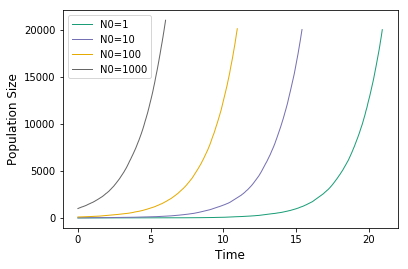

In [24]:
# Plot population size over time with different initial population numbers
from matplotlib.pyplot import cm
N = 20000
b = 0.5
N0 = [1,10,100,1000]

fig, ax = plt.subplots()
color = iter(cm.Dark2(np.linspace(0,1,len(N0))))
for i in range(len(N0)):
    S, X = purebirth(N, b, N0[i])
    ax.plot(S, X,'b',color = next(color),linewidth=1)

label = []
for n in N0:
    lab = 'N0='+str(n)
    label.append(lab)
    plt.legend(label, loc='upper left')
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('Population Size', fontsize=12)


Q2: simple birth and death process + immigration
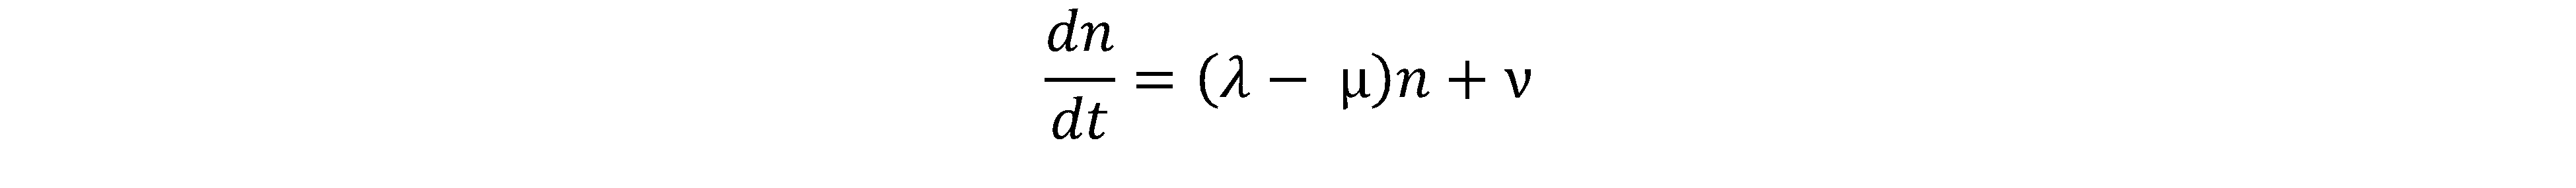

In [21]:
def immigration(N, N0, b, d, v):
    current_time = 0
    s = np.zeros(N)
    X = np.zeros(N)
    X[0] = N0
    s[0] = 0.00
    
    for i in range(N-1):
        U1 = np.random.rand()
        U2 = np.random.rand()
        h = -np.log(U1)/((b+d)*X[i]+v)
        s[i+1] = s[i] + h
        if U2 < b*X[i]/((b+d)*X[i]+v):
            X[i+1] = X[i]+1
        elif U2 >= b*X[i]/((b+d)*X[i]+v) and U2 < (b+d)*X[i]/((b+d)*X[i]+v):
            X[i+1] = X[i]-1
        elif U2 > (b+d)*X[i]/((b+d)*X[i]+v):
            X[i+1] = X[i]+1
    return s, X
    

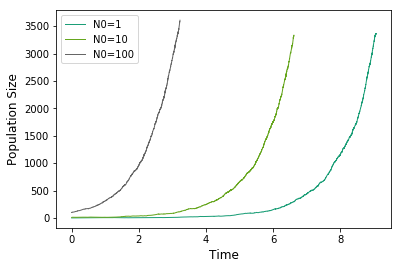

In [30]:

N = 10000
b = 2 # birth rate
d = 1 #death rate
v = 1 #immigration rate
N0 = [1,10,100]

fig, ax = plt.subplots()
color = iter(cm.Dark2(np.linspace(0,1,len(N0))))
for i in range(len(N0)):
    S, X = immigration(N, N0[i], b, d, v)
    ax.plot(S, X,'b',color = next(color),linewidth=1)
label = []
for n in N0:
    lab = 'N0='+str(n)
    label.append(lab)
    plt.legend(label, loc='upper left')
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('Population Size', fontsize=12)

Show that the mean of the corresponding stochastic model
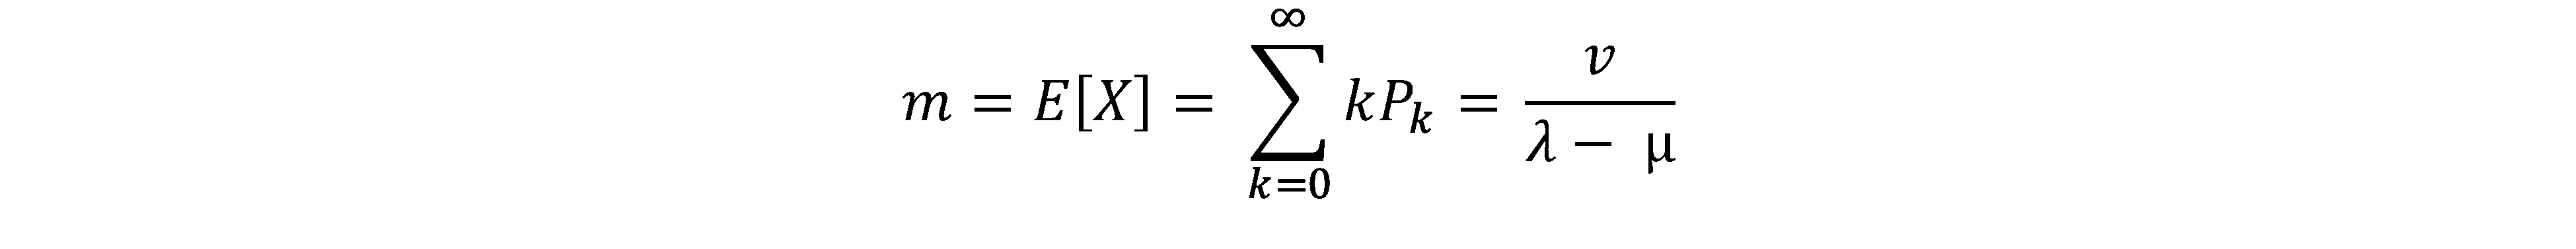

Give an example to show that this is not true for more general birth and death process with immigration, and illustrate the example numerically.

If the birth and death rate are not constants. If we assume the resulting birth and death rates for the population:
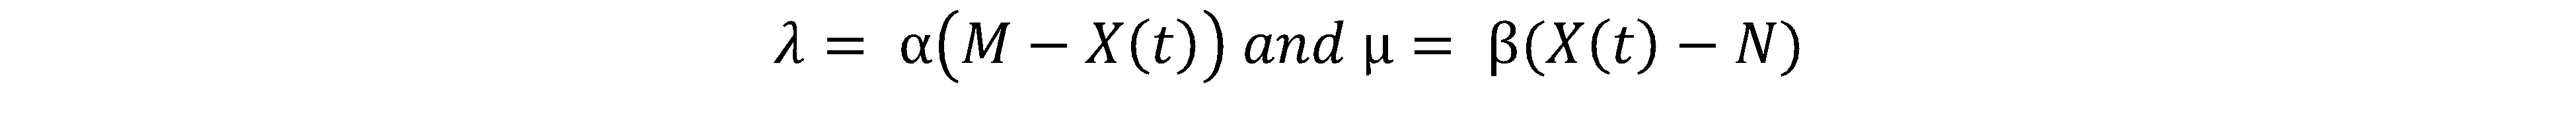
We would expect the process to fluctuate between the two constants N and M. The population grows in logistic process. If the population X(t) is near M, the death rate is high and the birth rate is low, and then X(t) will tend to N. Ultimately, the process should display stationary fluctuations between the two limits N and M.

Q3：The transition matrix for a four-state Markov chain is
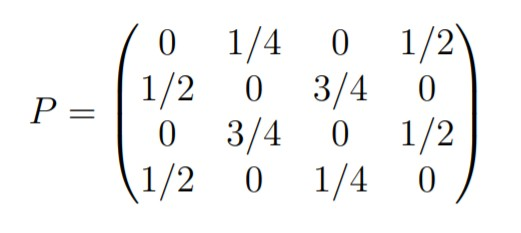

(a) Draw the directed graph of the chain
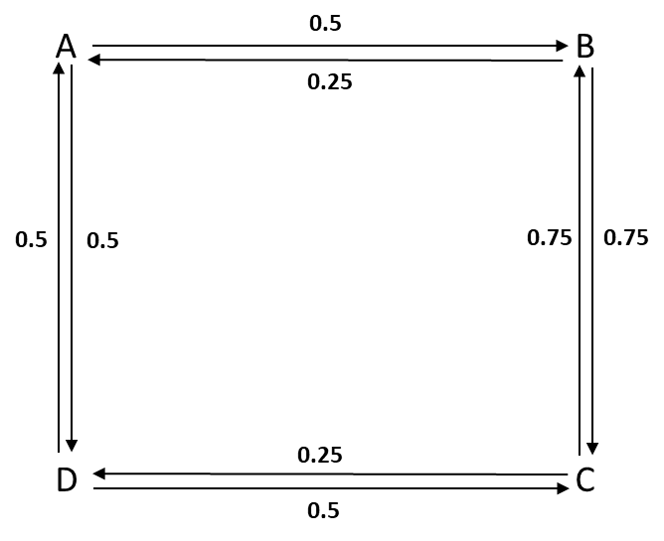

(b) Show that the chain is irreducible, possitive recurrent, and periodic. What is the period?

Irreducibility is the property that there is a positive probability of transitioning between any two states in a ginite number of steps. In this 4 state matrix, any communiation between any pair of two states can be reached.
This Markov chain is irreducible and has a stationary distribution, so this Markov chain is positive recurrent.
A state in a Markov chain is periodiv if the chain can return to the state only at multiples of some integer larger than 1.

(c) FInd the unique stationary probability distribution

(1,1,1,1)

Q4: Assume that the arrival of proteins to a promoter can be described as a Poisson process with rate λ. If the promoter is not occupied, it will bind the protein. The time the proteins remain bound are independent random variables with mean µ. A protein that arrives when the promoter is occupied diffuses away.

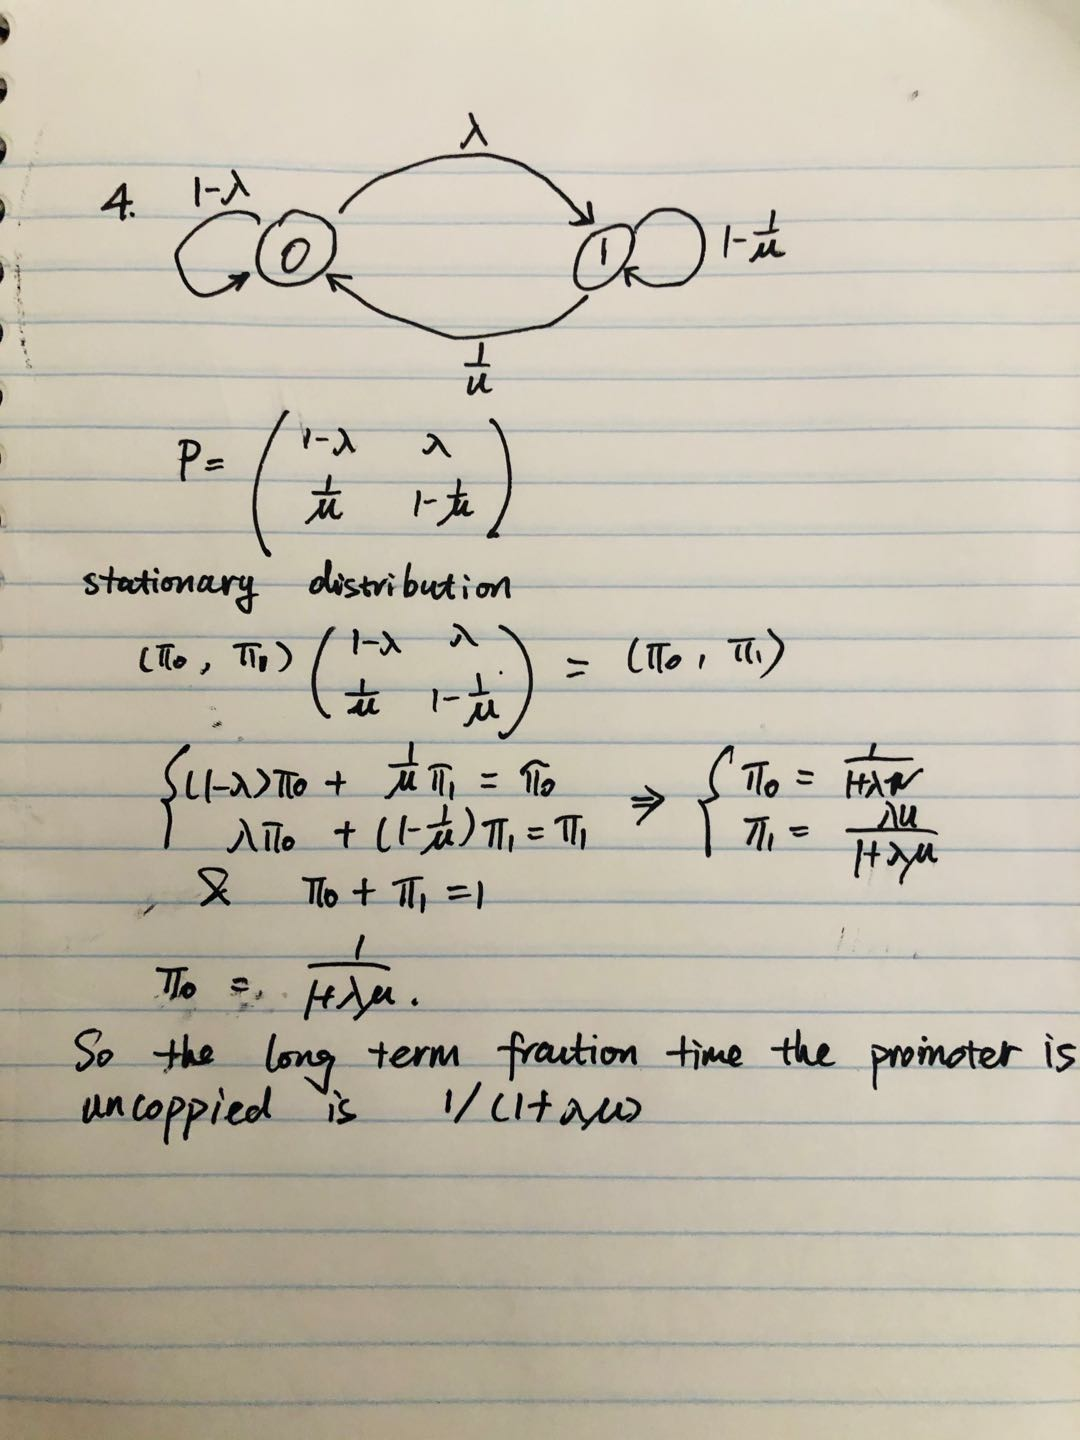

Q5: Poisson model of Spike generation.

Assume that the sequence of action potentials (APs) fired by a neuron can be described as a Poisson process. For a fixed time t, let T(t) be the time to the nearest AP in time. This could be an AP preceding or subsequent to the time t. What is the mean of T(t)? What is the probability density function of T(t)?

*T(t) is the waiting time between spikes. We expect no spike to occur with the interval (t0, t0+tau)
If we assuming r is the firing rate.
So,
    P{next spike occurs after tau} = exp(-r*tau)
    P{next spike occurs before tau} = 1 - exp(-r*tau)

The probability density function for the waiting time until the next spike is the derivative of the above cumulative distribution:
    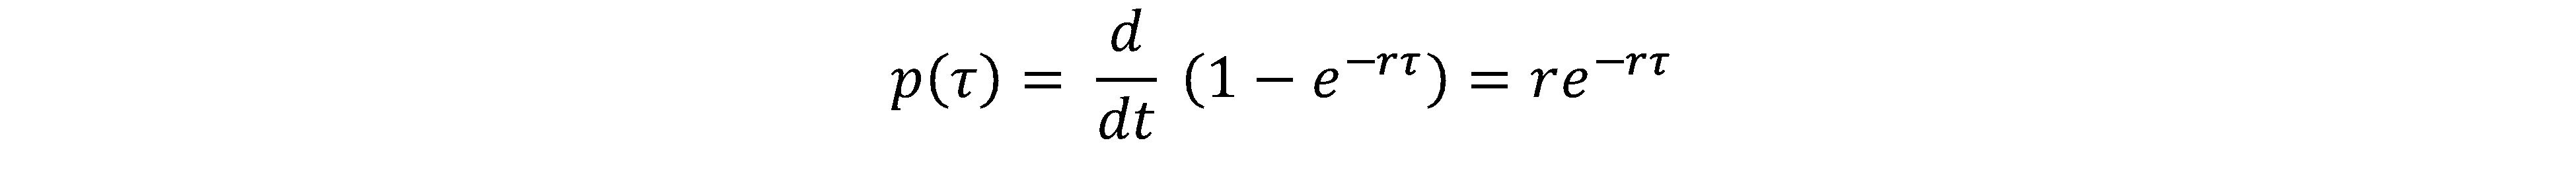
The mean duration between events is :
    E(tau) = 1/r